# TAL Labo 1c : mêmes opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [69]:
import nltk
import os
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline

S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [3]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
response = request.urlopen(url2)
html2 = response.read().decode('utf8')

print("Number of characters on wikipedia switzerland:", len(html2))

Number of characters on wikipedia switzerland: 803634


Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le contenu de la page est stocké dans `html2`, nous extrayons le texte dans `raw2`.

In [6]:
from bs4 import BeautifulSoup

In [92]:
raw2 = BeautifulSoup(html2).get_text()

Réutilisez la méthode de la partie 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse ("ne parle pas de la Suisse").  Quelle est la longueur du résultat ? Afficher aussi ses 100 premiers et 100 derniers caractères (p.ex. `raw2trimmed`).

In [58]:
# Please write your Python code below and execute it.
start_delimiter = "Main article: Name of Switzerland"
end_delimiter = "Notes and references"

article_start = raw2.find(start_delimiter)
raw2 = raw2[article_start:]
article_end = raw2.find(end_delimiter)
cleaned_article = raw2[:article_end].replace('\r\n', ' ')

print("Length of the article: ", len(cleaned_article))
print()
print("First 100 characters: ")
print(cleaned_article[:100])
print()
print("Last 100 characters: ")
print(cleaned_article[-100:])

Length of the article:  93548

First 100 characters: 
Main article: Name of Switzerland

The English name Switzerland is a compound containing Switzer, an

Last 100 characters: 
elated articles
Outline of Switzerland
List of sovereign states and dependent territories in Europe



Effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Ecrivez le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [39]:
filename = "sample_web_page.txt"
# Please write your Python code below and execute it.
sentences = nltk.sent_tokenize(cleaned_article)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

with open(filename, 'w', encoding='utf8') as fd:
    for sentence in tokenized_sentences:
        fd.write(' '.join(sentence))
        fd.write('\n')

Effectuer maintenant la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [35]:
# Please write your Python code below and execute it.
words2 = nltk.word_tokenize(cleaned_article)

print("Number of tokens: ", len(words2))

Number of tokens:  17581


Créez un objet de type nltk.Text à partir de la liste de *tokens* `words2`.  Appliquez-lui à titre d'exemple les méthodes `concordance`, `similar` et `collocations`. 

In [97]:
# Please write your Python code below and execute it.
text = nltk.Text(words2)

word = "Vaud"

print("Words in concordance: ")
text.concordance(word)

print()

print("Similar words: ")
text.similar(word)

print()

print("Collocations: ")
text.collocations()

Words in concordance: 
Displaying 4 of 4 matches:
Chur Valais 23 Sion Jura 26 Delémont Vaud 22 Lausanne Lucerne 3 Lucerne Zug 9 
,722 13 Köniz Bern 42,044 4 Lausanne Vaud 139,408 14 La Chaux-de-Fonds Neuchât
anton of Geneva ( 35 % ) , canton of Vaud ( 26 % ) , or Zürich city ( city : >
 wine is produced mainly in Valais , Vaud ( Lavaux ) , Geneva and Ticino , wit

Similar words: 
unrest cantonal capital

Collocations: 
Main article; European Union; United Nations; St. Gallen; Federal
Council; Main articles; bilateral agreements; Federal Assembly;
Helvetic Republic; per capita; direct democracy; Swiss Confederacy;
Augusta Raurica; Grand Slam; Paul Scherrer; ice hockey; European
countries; See also; Swiss plateau; Old Swiss


Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant la liste des _tokens_ en un `set`.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [46]:
# Please write your Python code below and execute it.
vocabulary = set(text)
print("Number of different words: ", len(vocabulary))
print("Words greater than 15 letters: ", list(filter(lambda x: len(x) > 15, vocabulary)))

Number of different words:  4134
Words greater than 15 letters:  ['monochromatically', 'Romansh-speaking', 'autobahn/autoroute', 'energy-producing', 'SwitzerlandSwiss', 'around-the-clock', 'authoritarianism', 'Hydroelectricity', 'Schneider-Ammann', 'Basel-Landschaft', 'machines/electronics', 'electricity-generating', 'Donau-Iller-Rhine-Limes', 'General-in-Chief', 'hydroelectricity', 'commander-in-chief', 'counter-proposal', 'Switzerland-related', 'Sonderbundskrieg', 'Telecommunication', 'Non-Proliferation', 'regions.Agricultural', 'Italian-speaking', 'Gallen-Altenrhein', 'instruments/watches', 'Switzerland–European']


Construisez un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [50]:
# Please write your Python code below and execute it.
cleaned_text = [word.lower() if word.isalpha else word for word in text]

word_frequency = nltk.FreqDist(text)

most_common_words = word_frequency.most_common(30)
print(most_common_words)

[('the', 1090), (',', 831), ('of', 619), ('.', 593), ('and', 462), ('in', 436), ('[', 341), (']', 341), ('(', 246), (')', 246), ('to', 229), ('Switzerland', 213), ('a', 194), ('Swiss', 179), ('The', 164), ('%', 146), ('is', 143), ('as', 113), ('are', 108), ('for', 102), ('was', 97), ('by', 97), ('from', 81), ('with', 81), ('has', 65), ("'s", 63), ('at', 59), (':', 58), ('on', 55), ('In', 54)]


Affichez le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

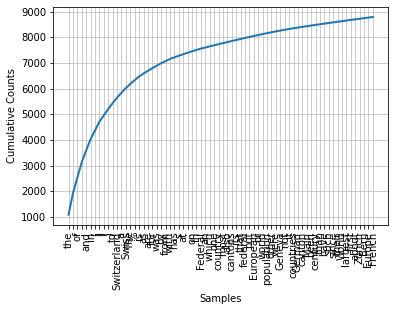

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [51]:
# Please write your Python code below and execute it.
word_frequency.plot(70, cumulative=True)

Construisez une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

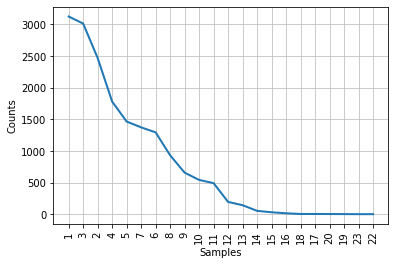

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
# Please write your Python code below and execute it.
word_lengths = [len(word) for word in text]

length_frequency = nltk.FreqDist(word_lengths)

length_frequency.plot(cumulative=False)

**Loi de Zipf.**  Générez la liste des fréquences des mots de votre texte par ordre décroissant (seulement les valeurs des fréquences).  Limitez cette liste à *N&nbsp;* valeurs (par exemple *N&nbsp;* = 100).  Affichez avec `matplotlib.pyplot.plot` la courbe en fonction du rang (donc le rang (1, 2, 3, ..., *N&nbsp;*) sur l'axe *x&nbsp;* et la fréquence sur l'axe *y&nbsp;*).  Ajoutez une courbe de la forme *y&nbsp;* = *a&nbsp;* / (*x&nbsp;* + *b&nbsp;*) en choississant des valeurs de *a&nbsp;* et *b&nbsp;* qui rapprochent autant que possible de la courbe des fréquences.

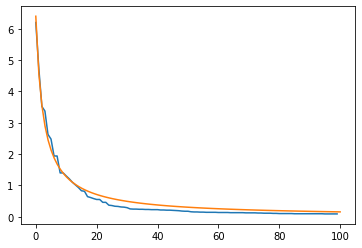

In [105]:
import numpy as np
# Please write your Python code in this cell and execute it.
limit = 100

frequencies = list(word_frequency.values())
frequencies.sort(reverse=True)
total = sum(frequencies)

# change frequencies to percentage
frequencies = list(map(lambda x: (x/total)*100, frequencies))
# get the first 100
frequencies = frequencies[:limit]

x = np.linspace(0,limit,limit)
y = 16 / (x+2.5)
plt.plot(frequencies)
plt.plot(x, y)

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1b et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 